# Señales

### Librerías a utilizar

- MST
- Signal
- TSA
- oce

In [105]:
library(MTS)
library(signal)
library(TSA)
library(oce)
library(ggplot2)
library(descomponer)

In [107]:
datos<-read.csv("~/Downloads/example/TJ000.txt", header=FALSE, sep='\t')
PAM<-datos[,1]
VFSC<-datos[,3]
fullData<-matrix(c(PAM,VFSC),ncol=2)

head(fullData)

114.51,47.83
115.75,49.39
116.74,50.50
117.50,51.22
118.05,51.60
118.41,51.68


In [114]:
# Desde los datos discretos se generan las series temporales a 5HZ o período de 1/5 = 0.2 [s]
PAMt<-ts(data = PAM,  frequency = 5, deltat = 0.2 )
VFSCt<-ts(data = VFSC,  frequency = 5, deltat = 0.2 )

Time Series:
Start = c(1, 1) 
End = c(299, 1) 
Frequency = 5 
   [1] 114.51 115.75 116.74 117.50 118.05 118.41 118.60 118.65 118.58 118.41
  [11] 118.11 117.71 117.31 116.99 116.79 117.22 117.91 118.62 119.25 119.70
  [21] 119.13 118.20 117.18 116.21 115.39 115.51 115.86 116.31 116.80 117.08
  [31] 117.06 116.95 116.79 116.58 116.31 116.01 115.75 115.59 115.54 116.10
  [41] 116.78 117.48 118.11 118.57 118.08 117.43 116.73 116.08 115.70 116.04
  [51] 116.52 117.06 117.59 117.78 117.66 117.48 117.26 117.04 116.98 117.08
  [61] 117.23 117.42 117.64 117.97 118.31 118.62 118.84 118.95 118.51 117.86
  [71] 117.20 116.62 116.23 116.76 117.56 118.42 119.22 119.78 119.48 118.99
  [81] 118.37 117.70 117.07 116.64 116.29 116.06 115.97 116.32 116.93 117.56
  [91] 118.12 118.53 118.03 117.26 116.46 115.74 115.30 115.83 116.52 117.26
 [101] 117.94 118.09 117.80 117.38 116.88 116.35 115.96 115.65 115.42 115.29
 [111] 115.42 115.83 116.28 116.72 117.07 116.92 116.58 116.16 115.73 115.33
 [121] 115.12 

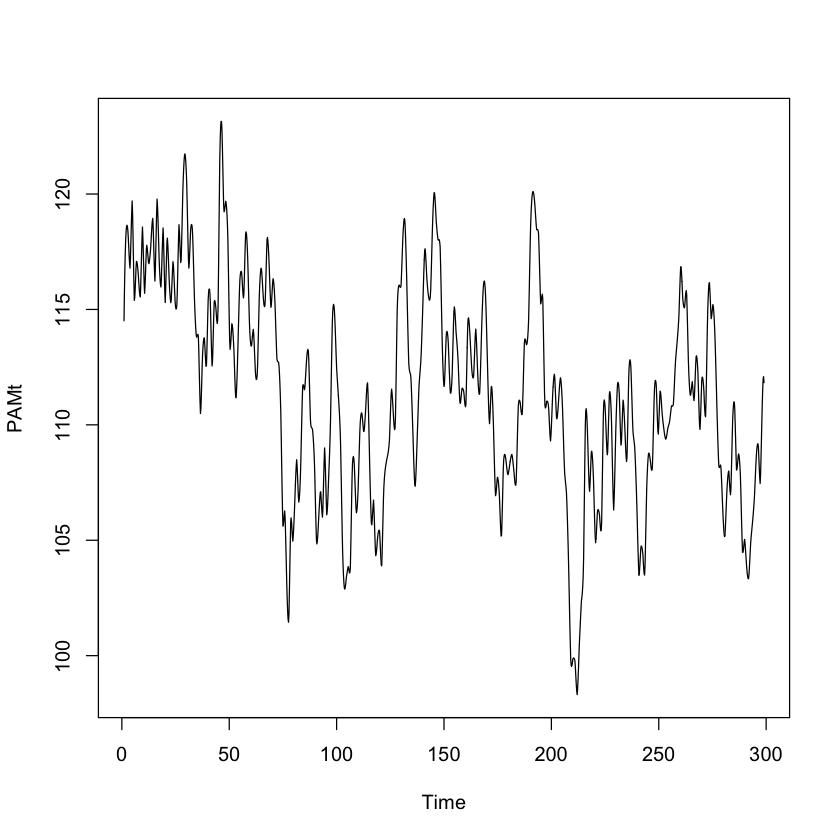

In [130]:
print(PAMt)
plot.ts(PAMt)

Time Series:
Start = c(1, 1) 
End = c(299, 1) 
Frequency = 5 
   [1] 47.83 49.39 50.50 51.22 51.60 51.68 51.53 51.18 50.69 50.10 49.49 48.89
  [13] 48.34 47.89 47.57 47.80 48.28 48.83 49.35 49.77 49.52 49.01 48.45 47.90
  [25] 47.43 47.56 47.81 48.09 48.33 48.33 47.99 47.56 47.07 46.55 46.07 45.64
  [37] 45.29 45.02 44.86 45.07 45.41 45.82 46.25 46.65 46.73 46.77 46.80 46.87
  [49] 47.03 47.46 47.93 48.39 48.82 49.05 49.10 49.09 49.03 48.94 48.90 48.92
  [61] 48.91 48.88 48.80 48.62 48.35 48.05 47.70 47.33 46.82 46.30 45.83 45.47
  [73] 45.26 45.69 46.29 46.92 47.48 47.80 47.29 46.64 45.92 45.23 44.74 44.70
  [85] 44.80 45.03 45.40 45.99 46.72 47.44 48.10 48.63 48.49 48.14 47.76 47.41
  [97] 47.25 47.78 48.41 49.06 49.67 49.94 49.90 49.75 49.50 49.17 48.80 48.42
 [109] 48.04 47.69 47.51 47.51 47.53 47.54 47.50 47.13 46.64 46.14 45.66 45.27
 [121] 45.17 45.18 45.28 45.47 45.85 46.35 46.83 47.21 47.42 46.83 46.13 45.44
 [133] 44.89 44.94 45.62 46.46 47.35 48.18 48.50 48.68 48.76 48.75 48

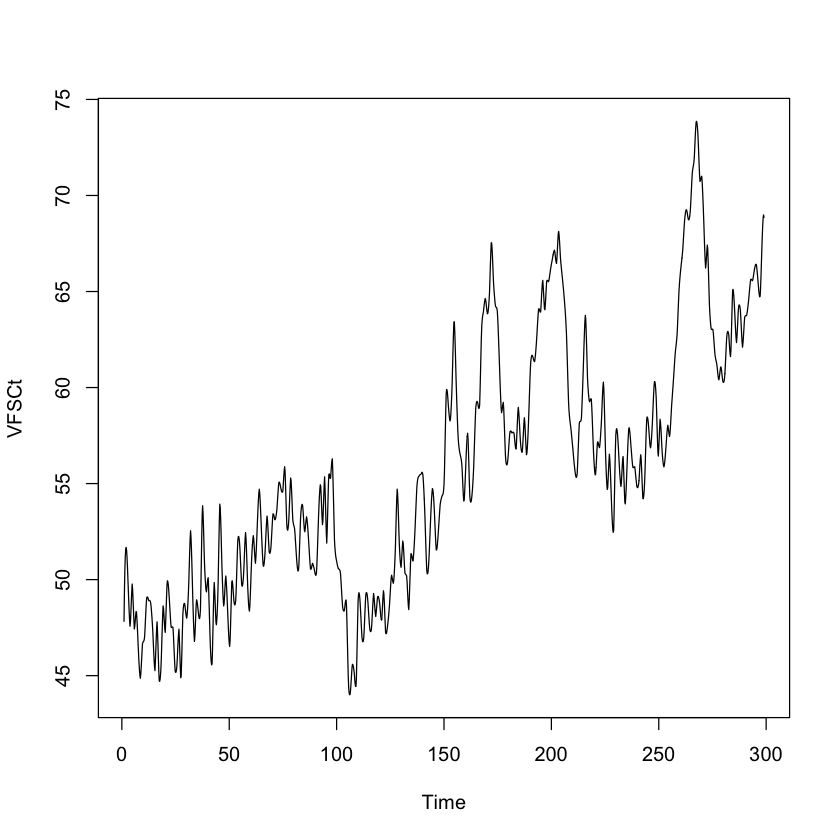

In [131]:
print(VFSCt)
plot.ts(VFSCt)

Cualquier serie temporal puede expresarse como una combinación de ondas coseno y seno con diferentes períodos (el tiempo que tarda en completar un ciclo completo) y amplitudes (valor máximo/mínimo durante el ciclo). Este hecho puede utilizarse para examinar el comportamiento periódico (cíclico) de una serie temporal. 

## Periodograma

* Un periodograma se utiliza para identificar los períodos (o frecuencias) dominantes de una serie temporal. Puede ser una herramienta útil para identificar el comportamiento cíclico dominante en una serie, sobre todo cuando los ciclos no están relacionados con la estacionalidad habitual.
* El periodograma mide aportaciones a la varianza total de la serie de componentes periódicos de una frecuencia determinada (w).Si el periodograma presenta un “pico” en una frecuencia, indica que dicha frecuencia tiene mayor “importancia” en la serie que el resto.

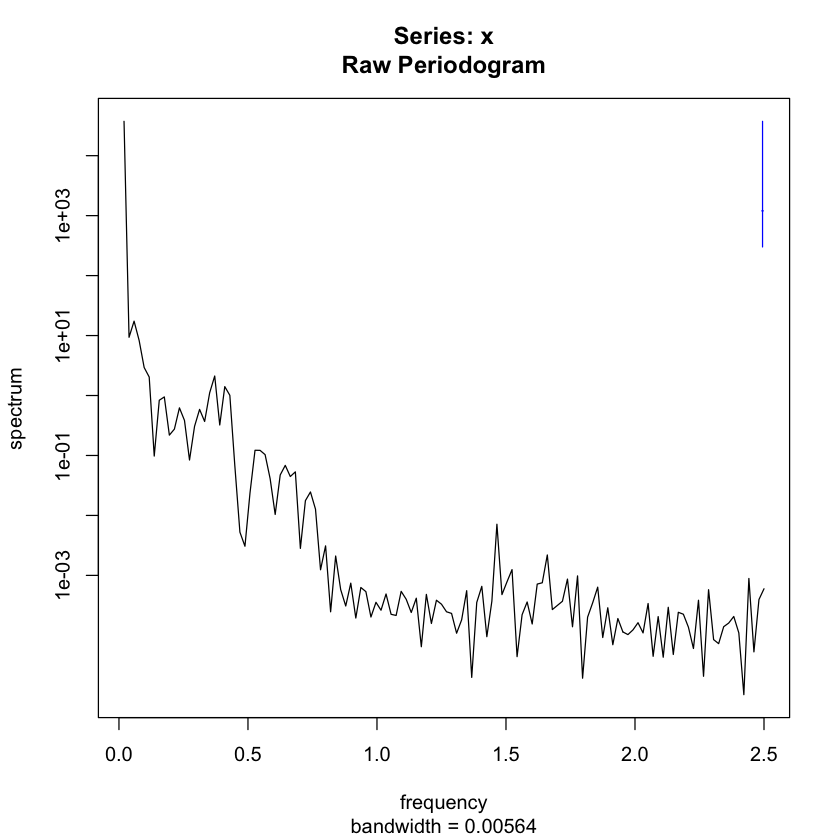

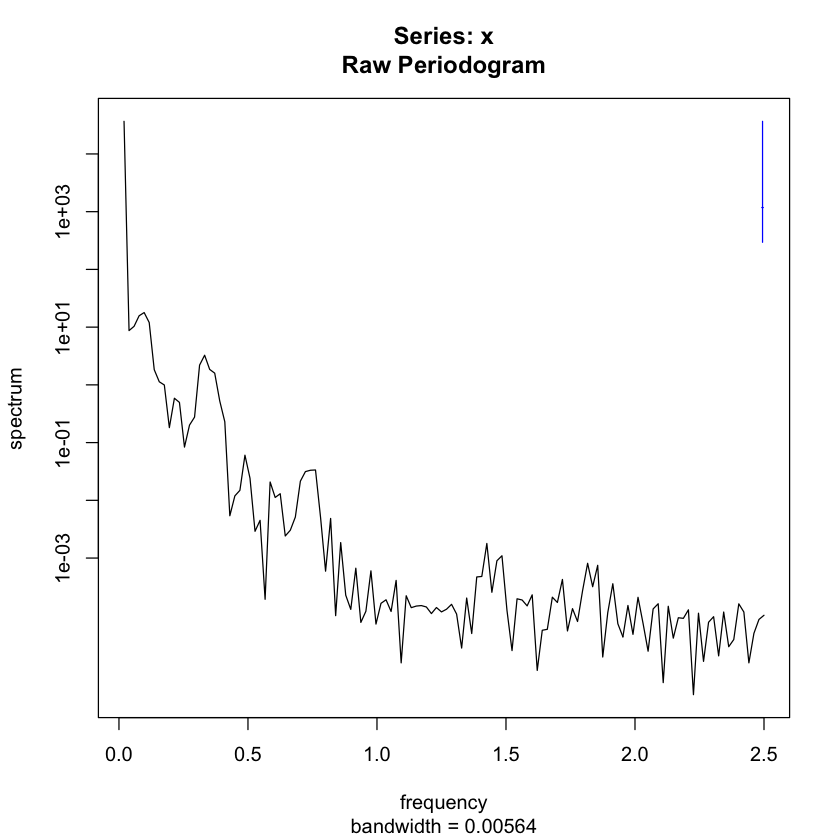

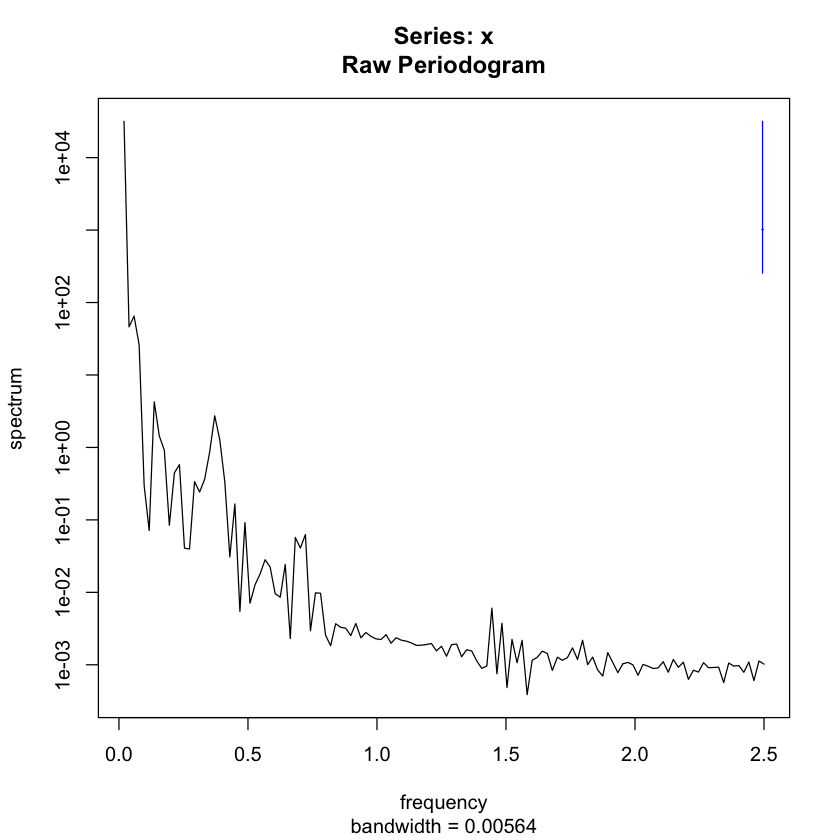

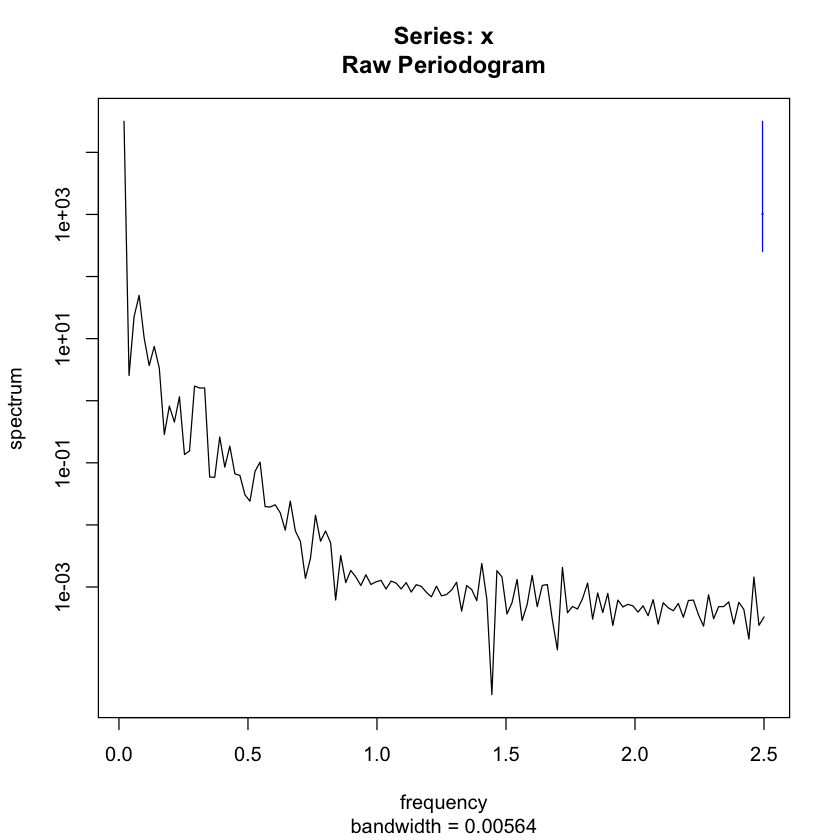

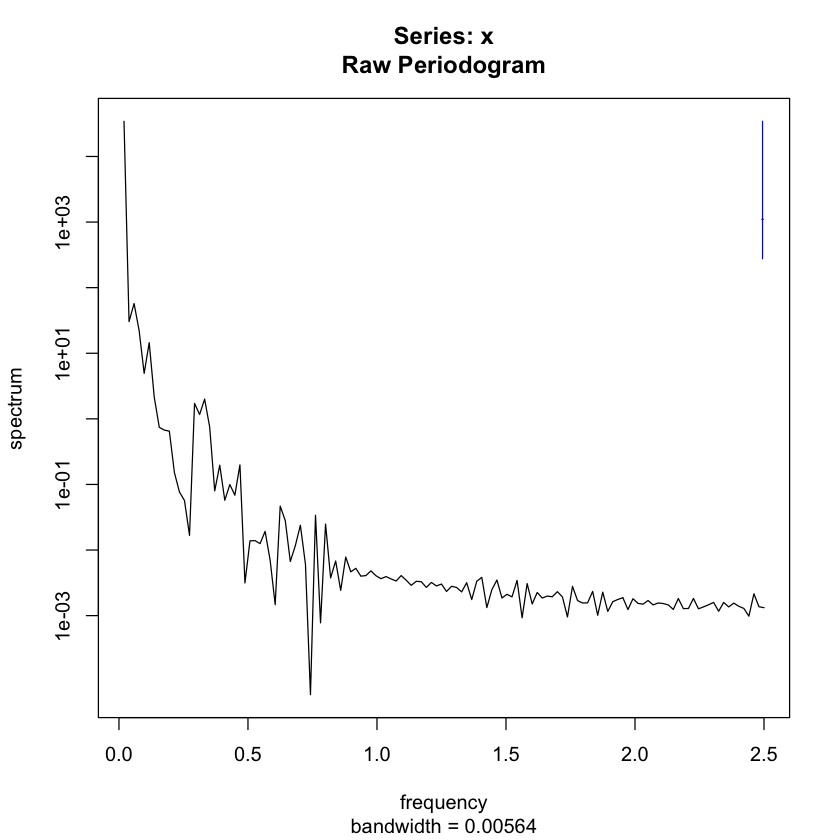

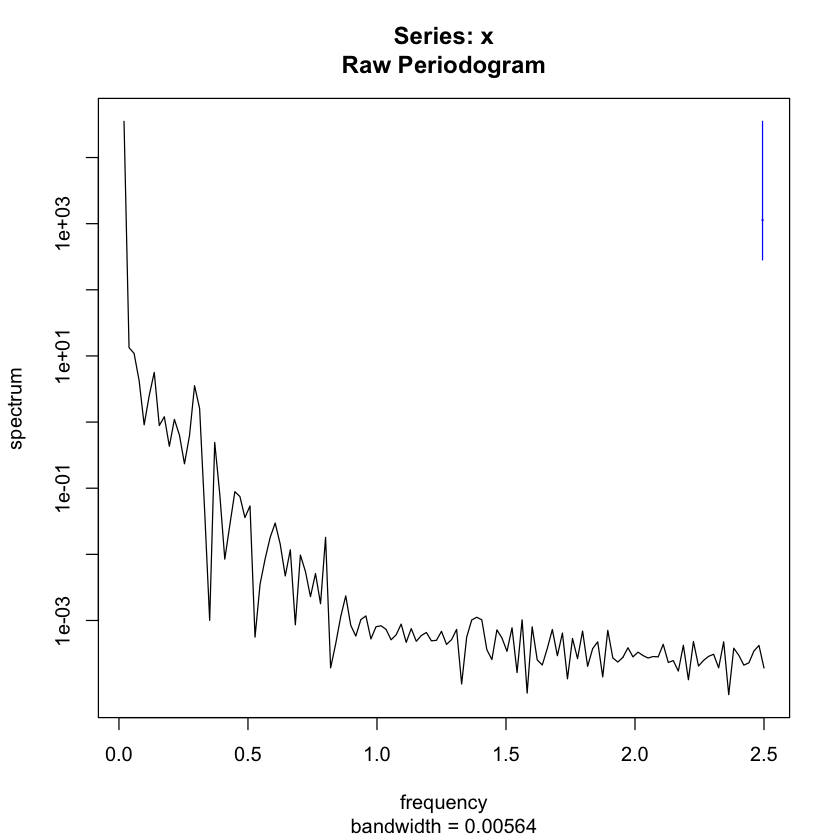

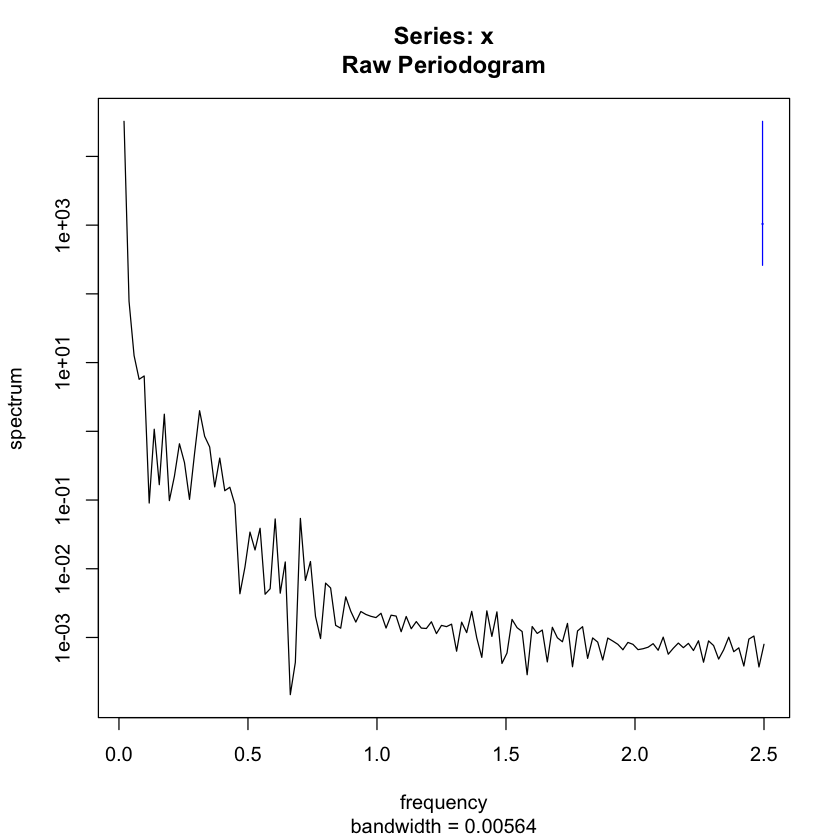

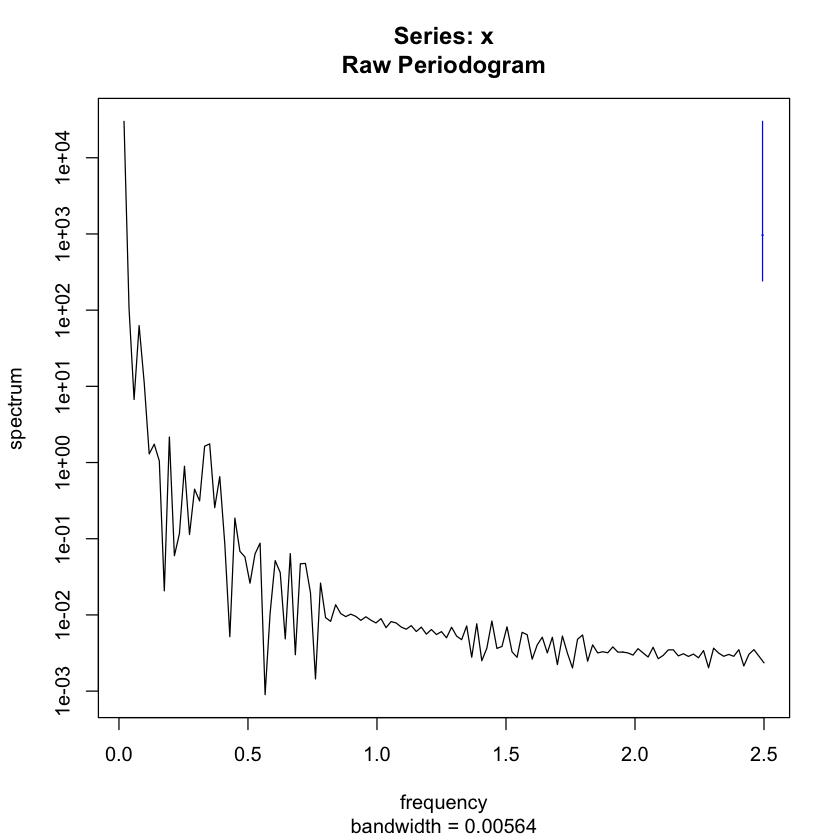

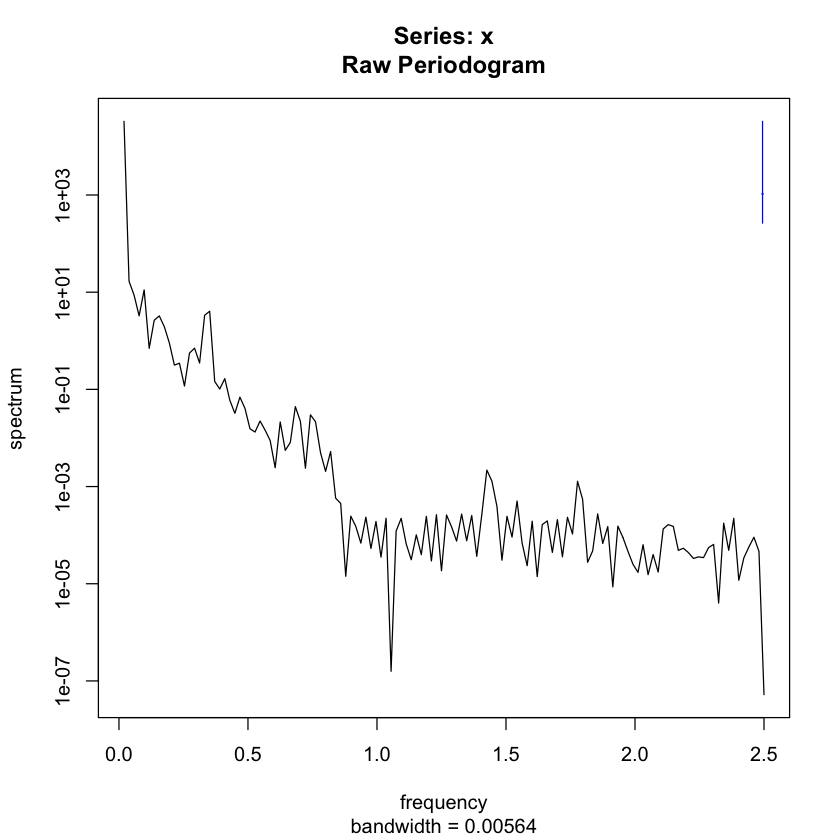

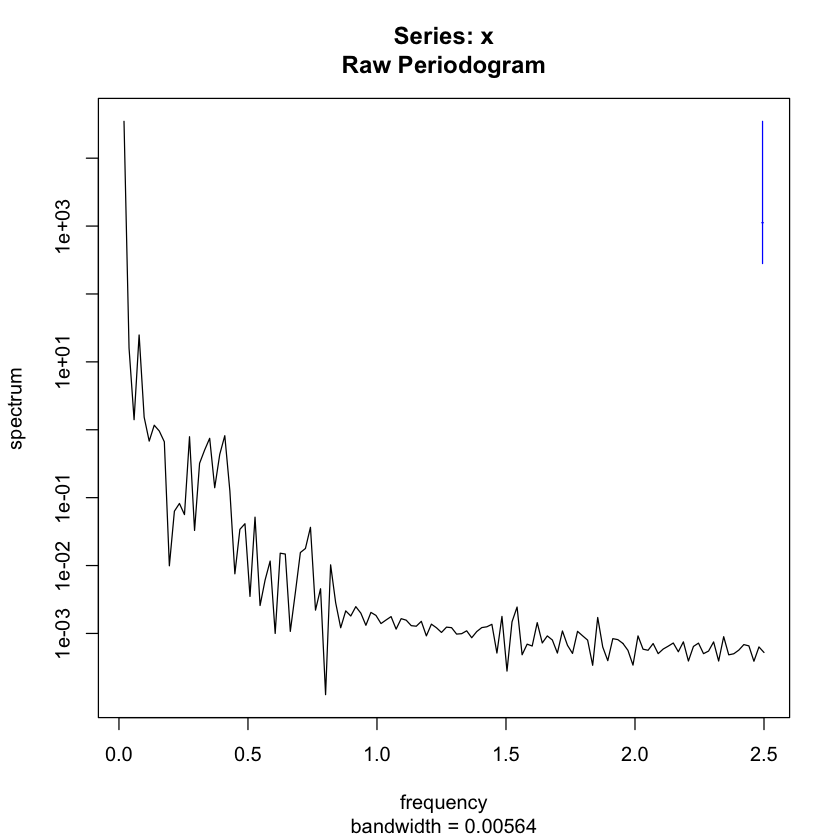

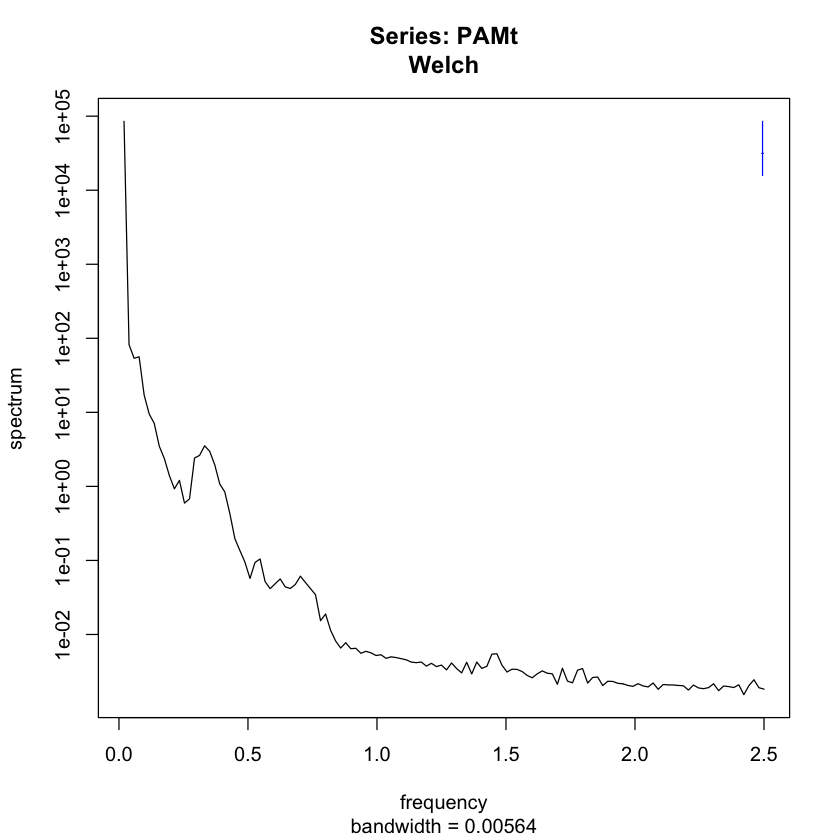

In [169]:
pwelch(PAMt, nfft=256, fs=5)

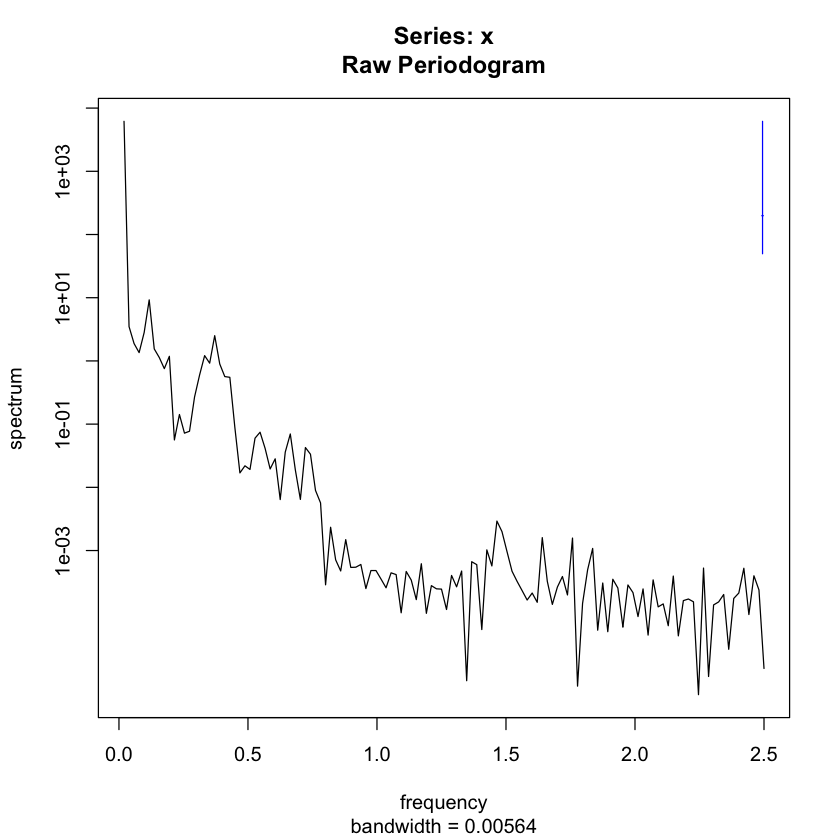

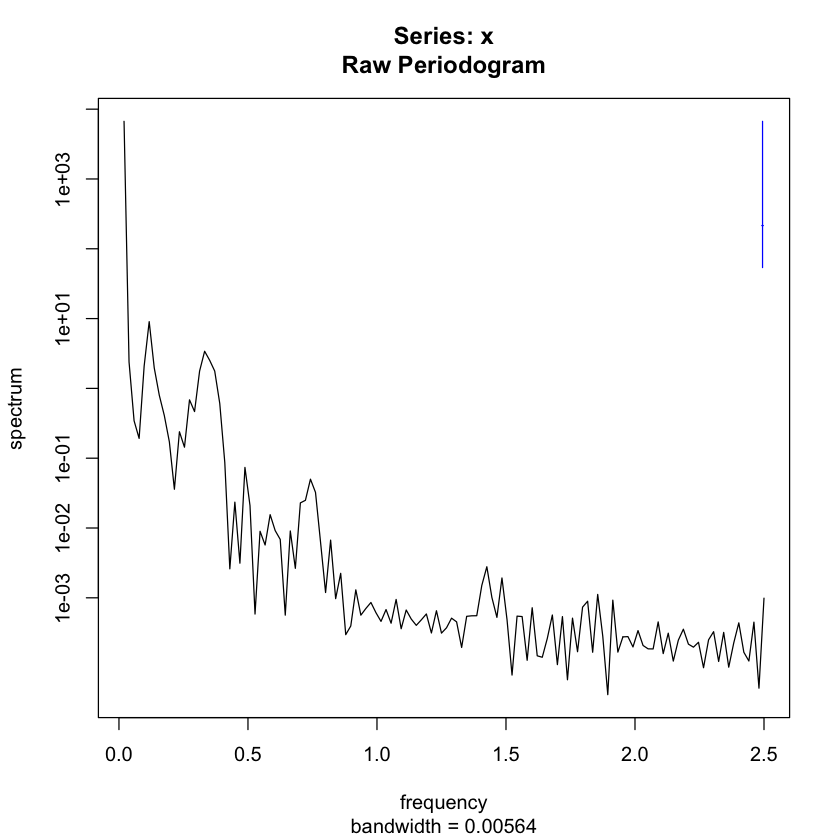

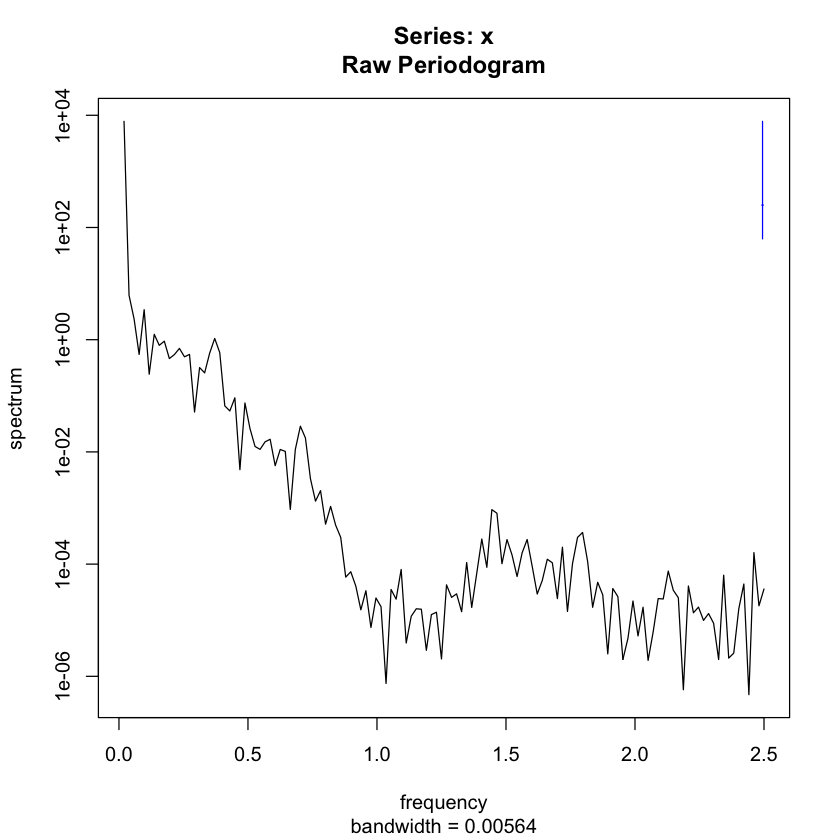

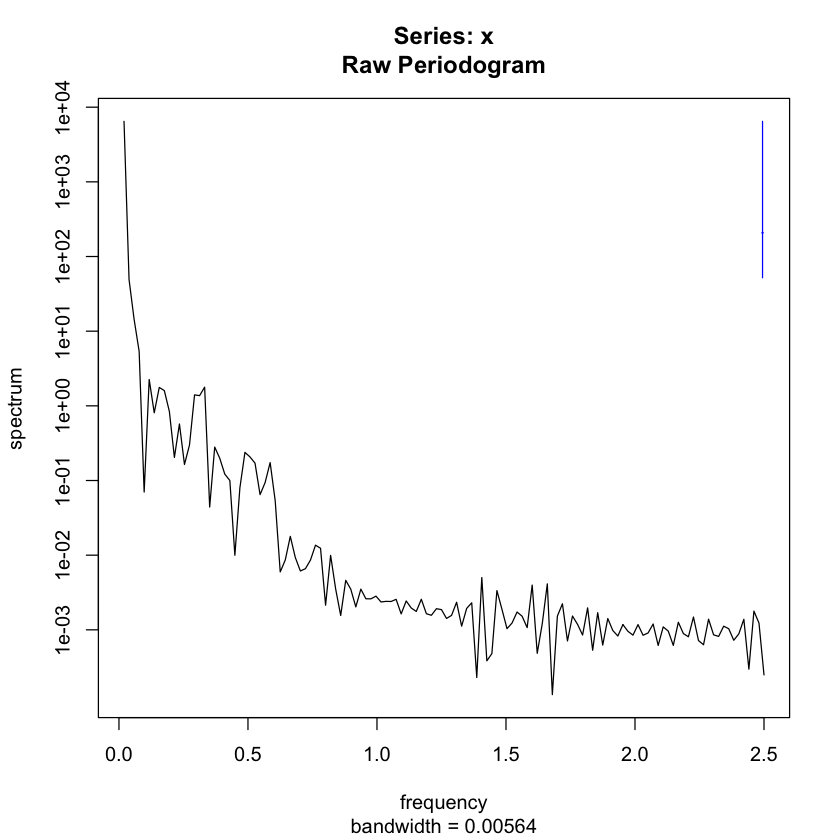

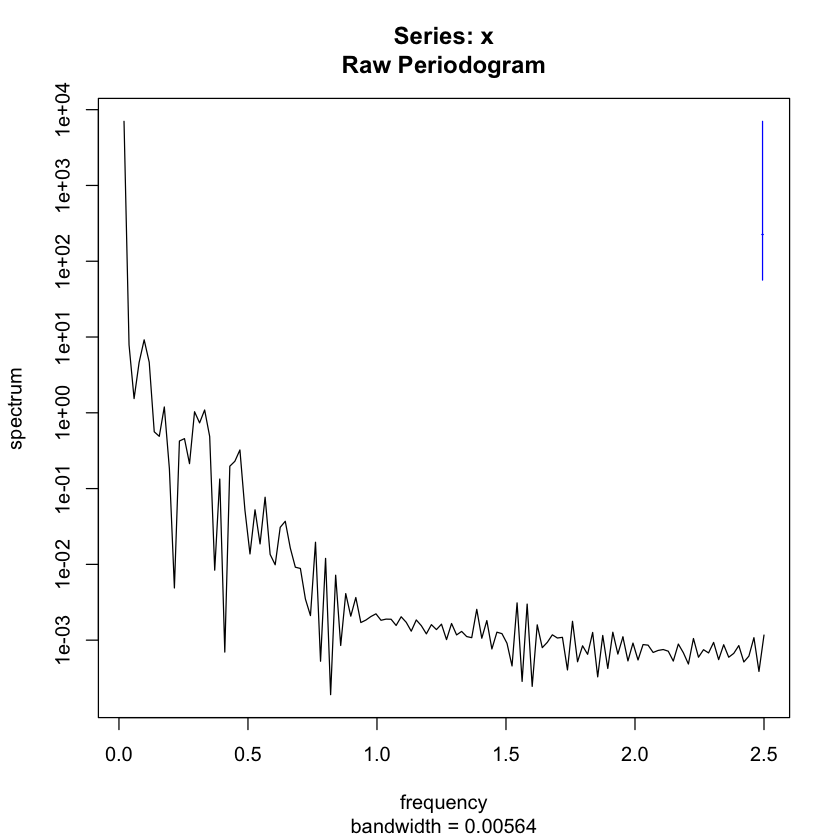

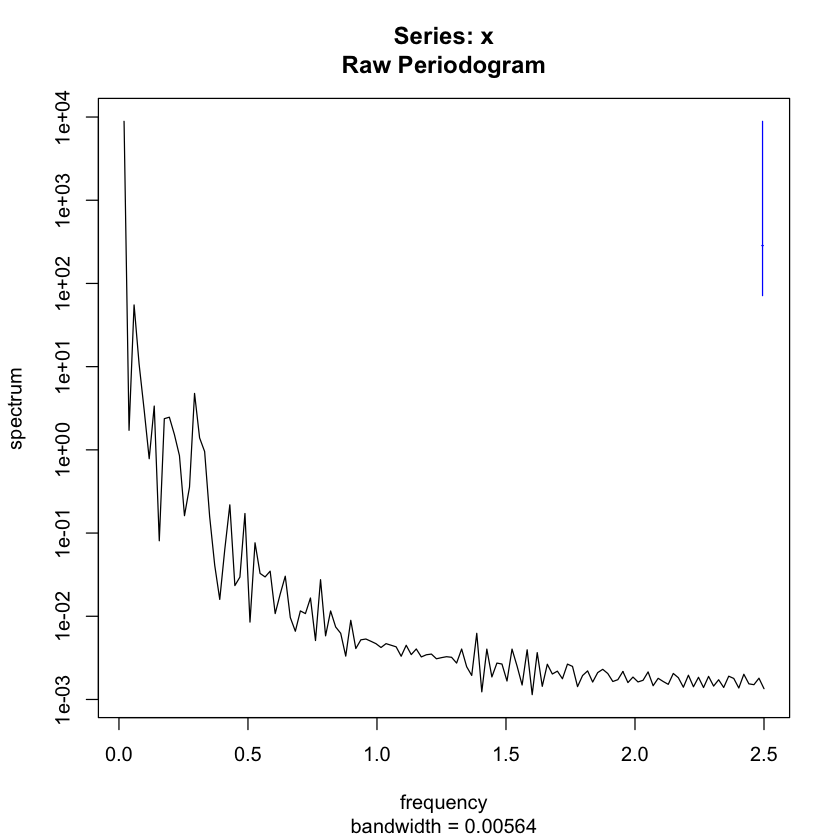

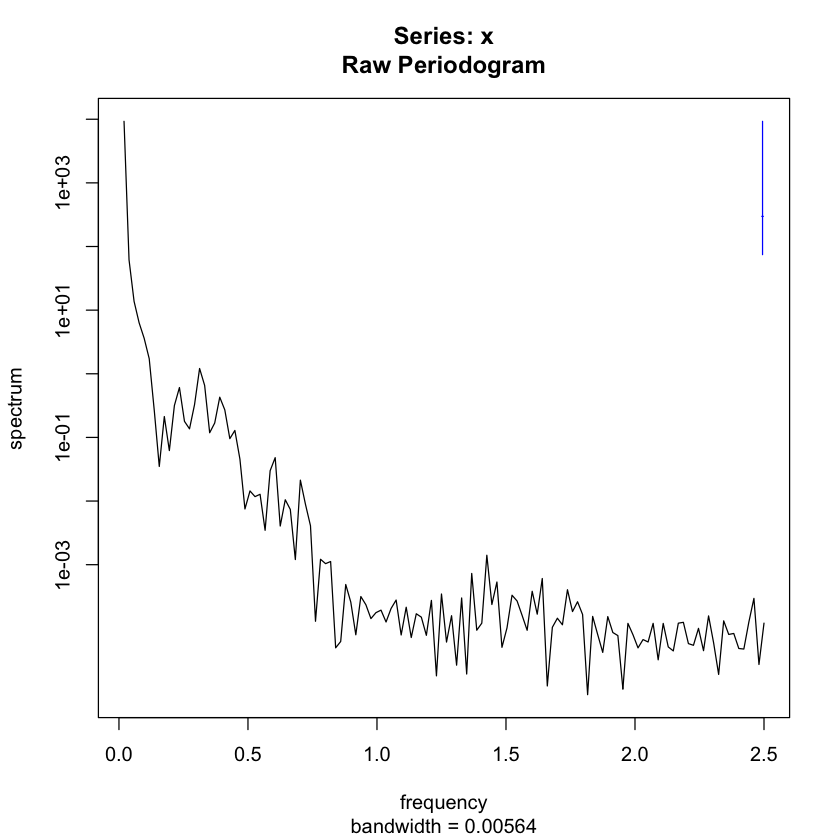

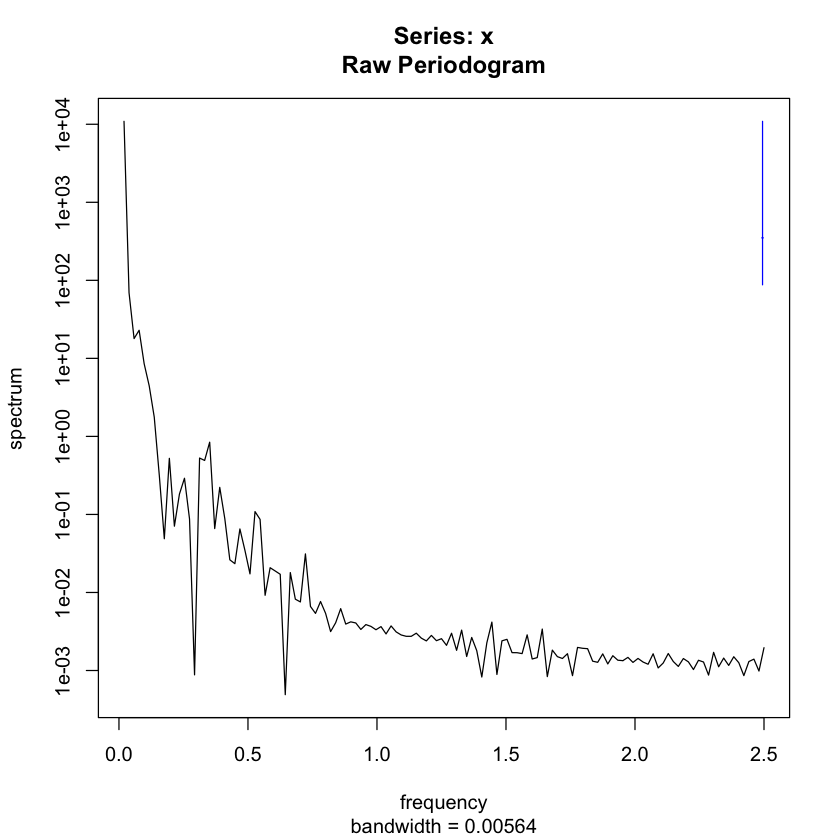

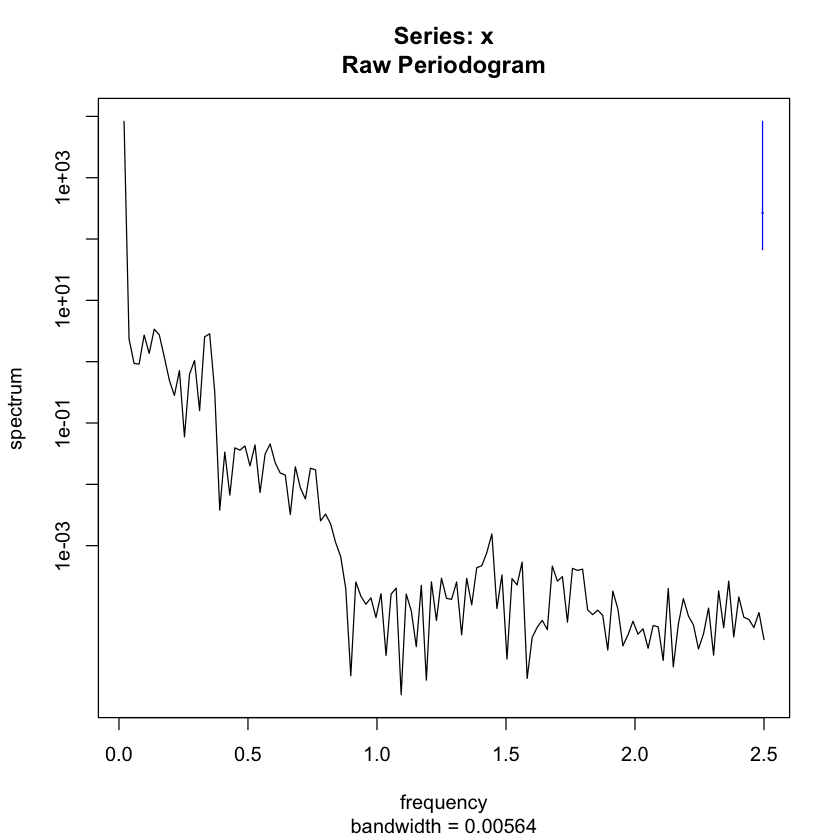

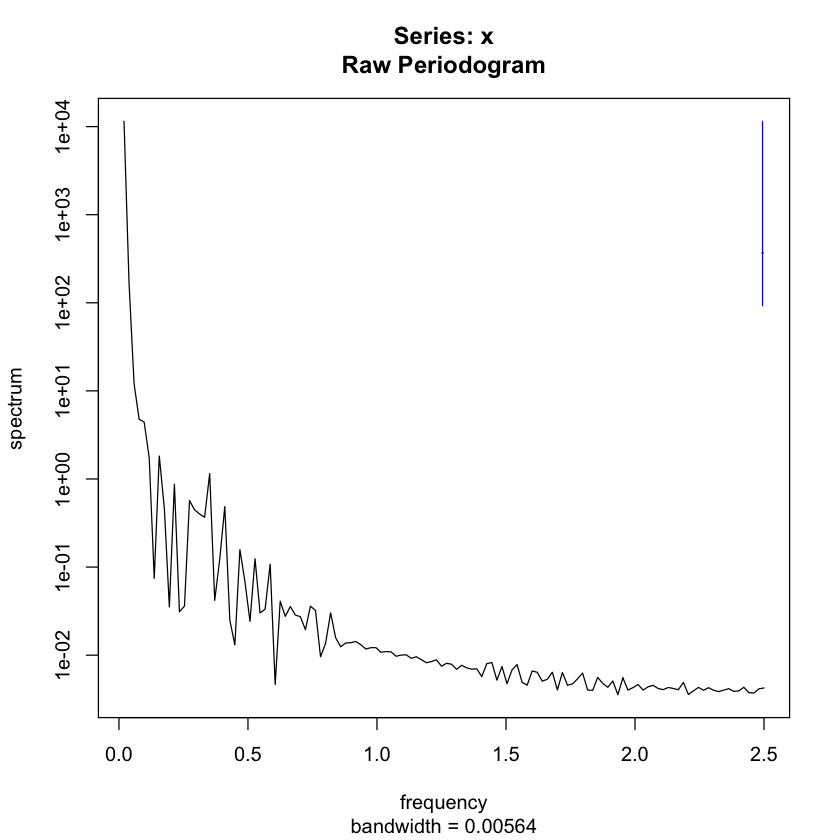

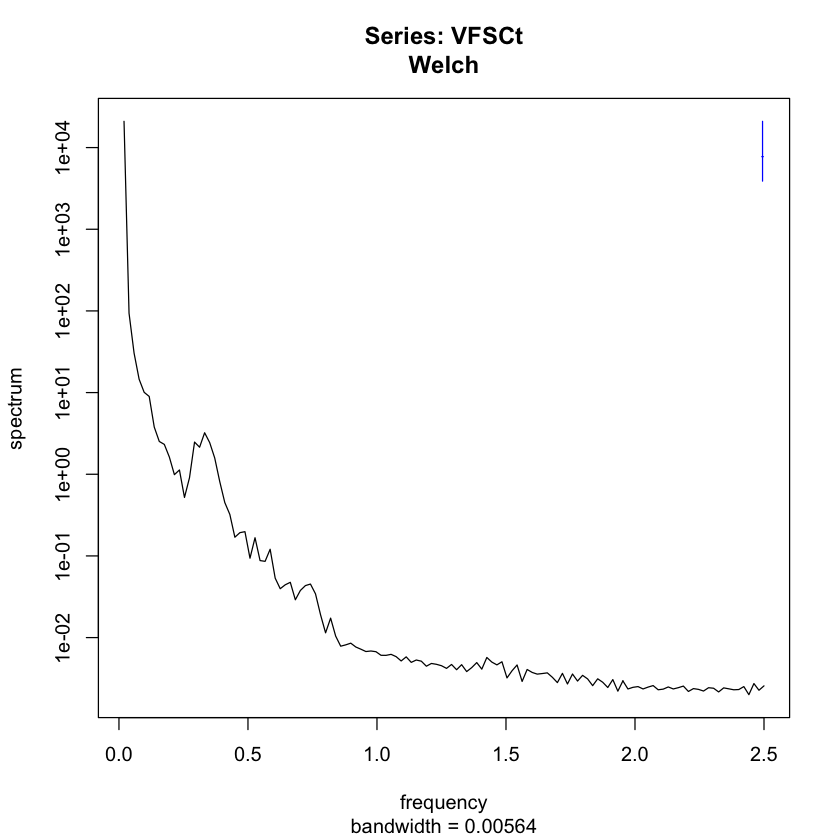

In [170]:
pwelch(VFSCt, lwd=1, nfft = 256)

## Función CCF

La función ccf(x, y) utiliza dos vectores para estimar la correlación entre x[t+k] e y[t]. Esto significa que no sólo correlacionará los vectores. Los correlacionará después de desplazar su posición relativa entre sí en k elementos. Además, normalmente no nos limitamos a especificar un valor de k. Aumentamos k de uno en uno y movemos los vectores para ver cómo cambian las correlaciones y encontrar un valor de k en el que la correlación sea mayor o menor. 

La función ccf(x,y) entrega la correlación entre las series temporales x e y
* Cuando el lag es 0, se está realizando la correlación en el tiempo 0, en la "actualidad".
* Cuando el lag es > 0, se está generando un retardo a x que se compara con y (correlación)
* Cuando el lag es < 0, se está generando un adelanto a x que se compara con y (correlación)

Por defecto ccf utiliza un rango de retardo (lag): +- 10*log10(N/m)
* N = Cantidad de puntos muestreados (largo de la serie temporal)
* m = Número de series a comparar.

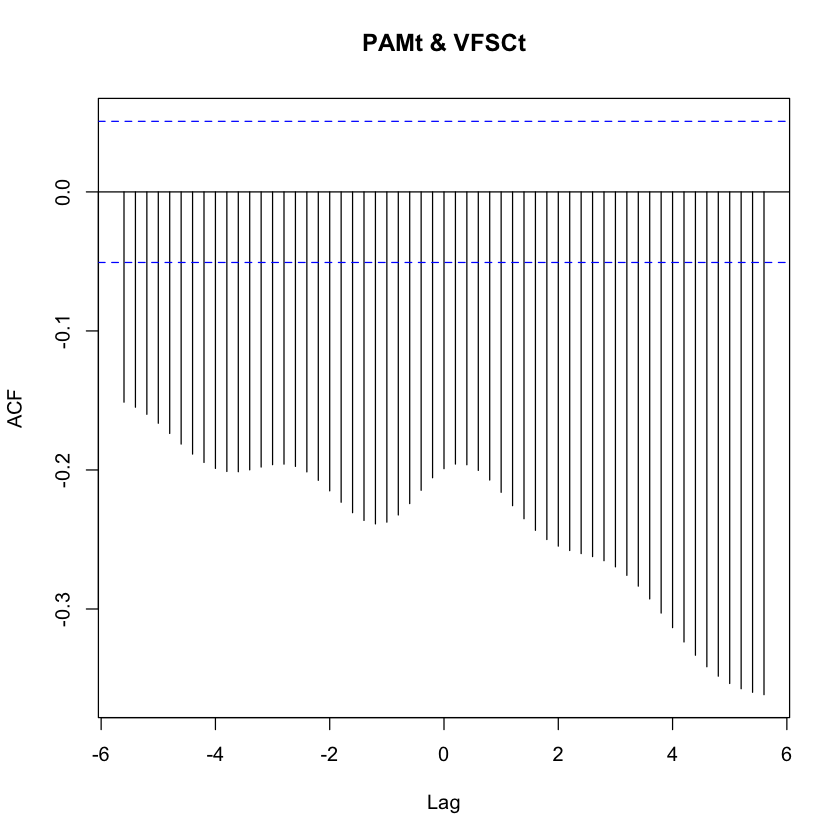

In [56]:
Rxy<-ccf(PAMt,VFSCt, pl="True") #cross correlation

* Podemos notar que en este caso da un lag de +-6 por defecto
* Sin embargo, esto se puede forzar y ver las correlaciones con un retardo establecido

#### Es importante entender cómo se relacionan estas series temporales, ya que en diferentes momentos tendrán diferentes correlaciones.

* Si se está por fuera de las líneas azules, entonces se considera estadísticamente significativa la correlación.
* Probar difentes rangos de retardos.

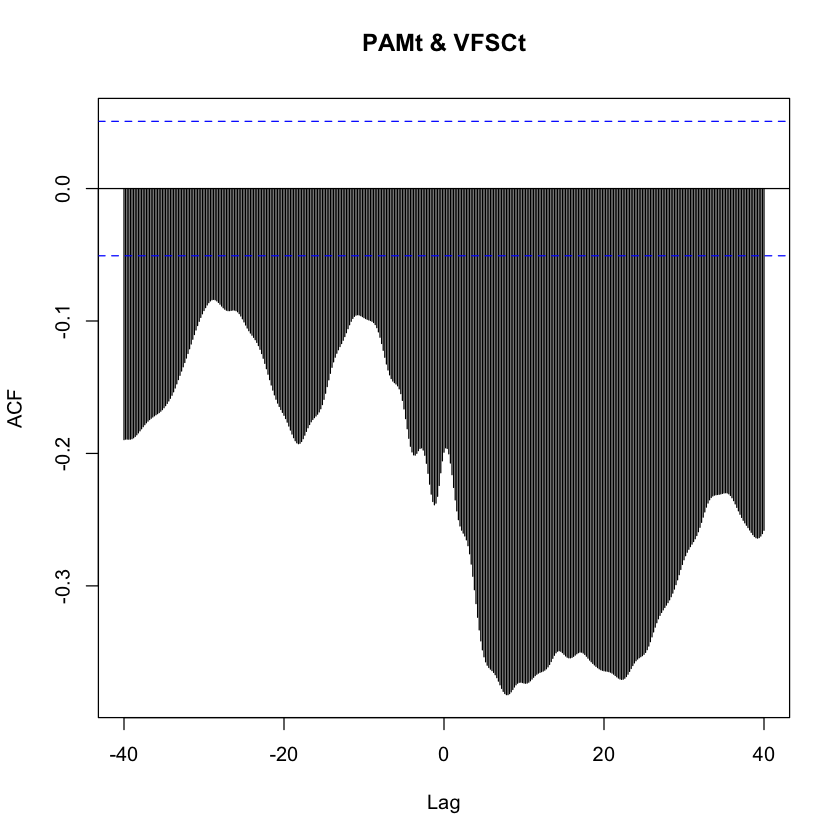

In [180]:
Rxy<-ccf(PAMt,VFSCt, lag.max= 200, pl="True") #cross correlation

* De las correlaciones se puede aplicar un periodograma suavizado pwelch

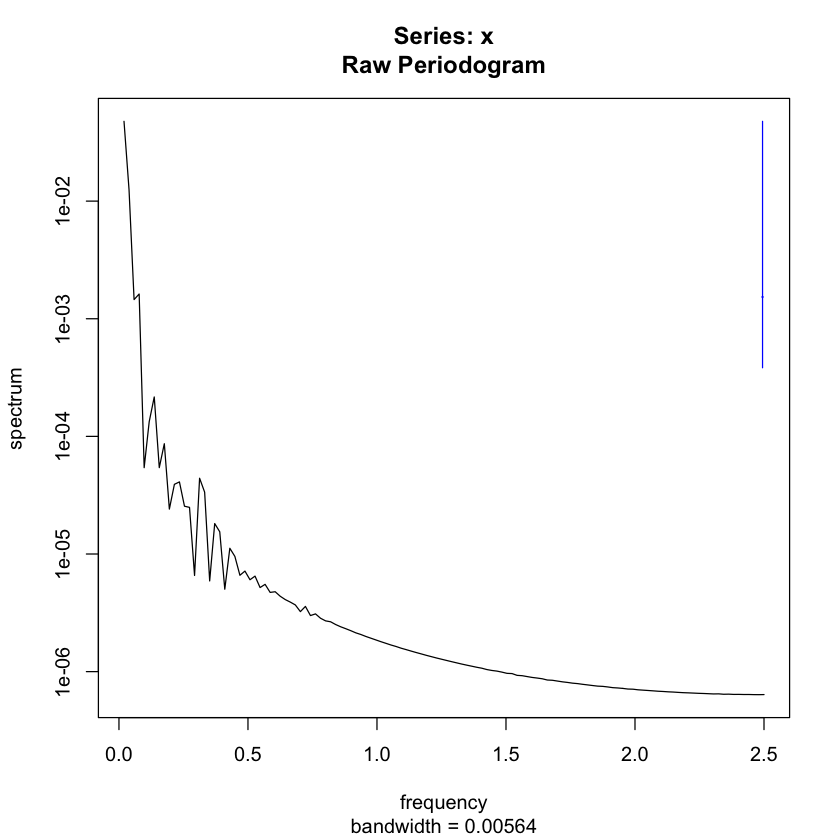

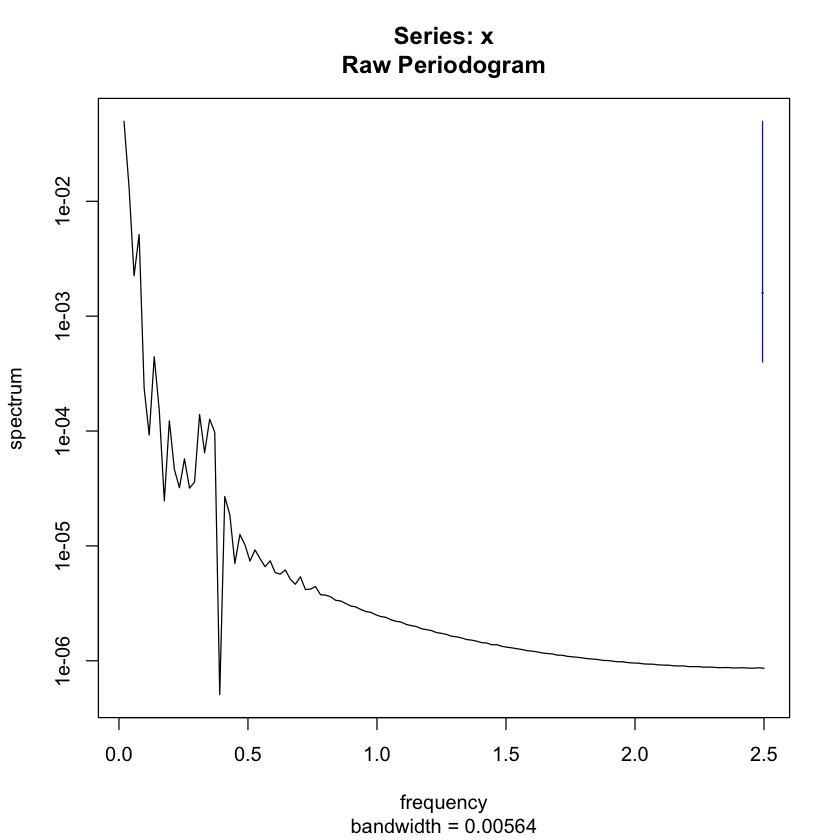

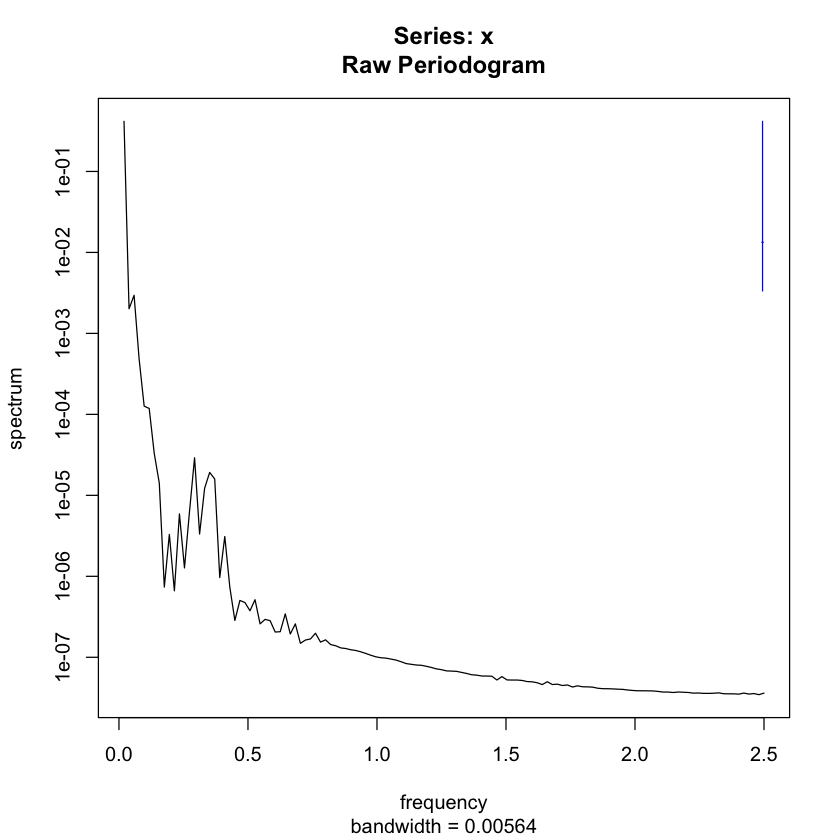

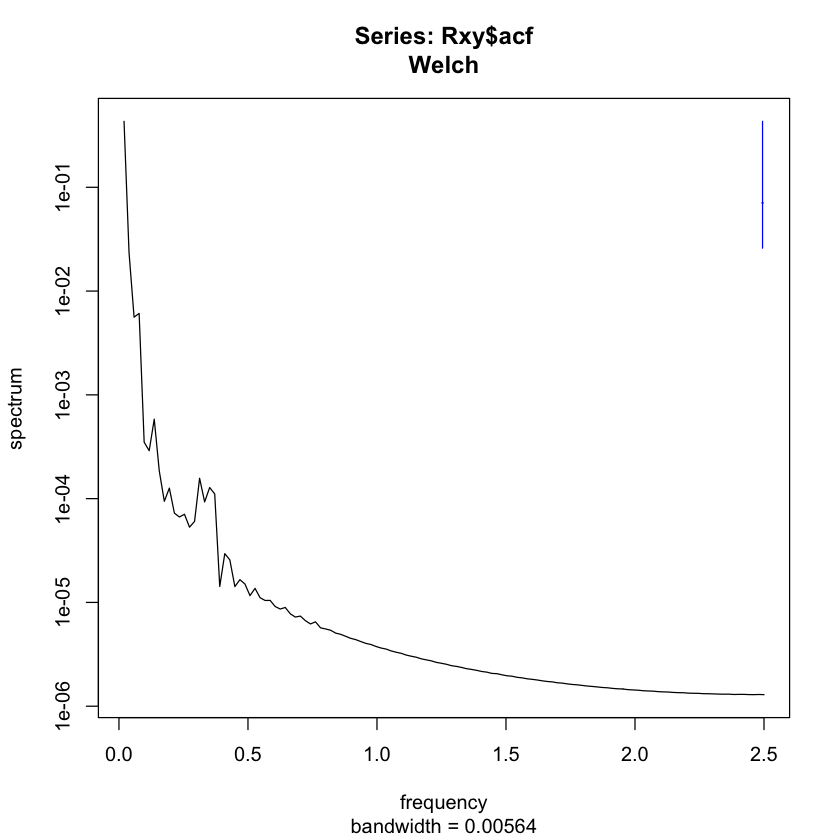

In [146]:
wRxy<-pwelch(Rxy$acf, nfft=256, fs=5, plot=TRUE )  

## Función ACF

Es un término estadístico que se utiliza para describir la presencia o ausencia de correlación en los datos de las series temporales, indicando, si las observaciones pasadas influyen en las actuales. Por tanto, se puede decir que la autocorrelación hace referencia cuando los valores que toman una variable en el tiempo no son independientes entre sí, sino que un valor determinado depende de los valores anteriores.

<b>La función ACF es usada para identificar el proceso de media móvil (MA) en un modelo ARIMA</b>

En estadística y econometría, en particular en series temporales, un modelo autorregresivo integrado de promedio móvil o ARIMA (acrónimo del inglés autoregressive integrated moving average) es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro. Se trata de un modelo dinámico de series temporales, es decir, las estimaciones futuras vienen explicadas por los datos del pasado y no por variables independientes.

* En análisis de serie del tiempo, el modelo de medias móviles (MA) es una aproximación común para series de tiempo univariadas. El modelo de medias móviles especifica que la variable de salida depende linealmente del valor actual y varios de los anteriores de un término estocástico.

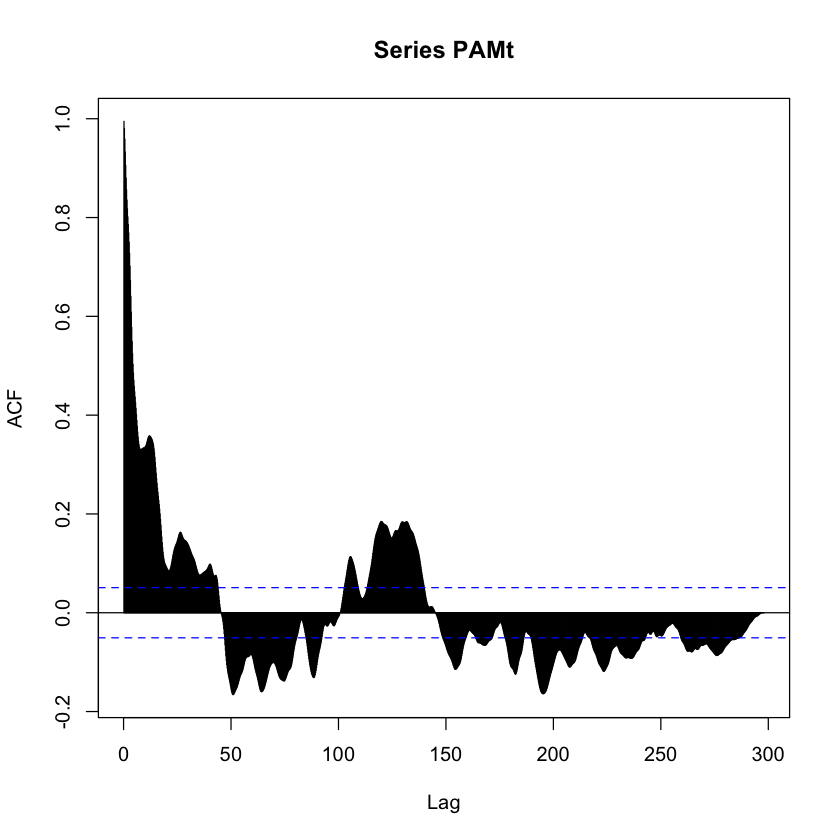

In [185]:
Rx<-acf(PAMt,lag.max = length(PAMt)) #auto correlation

wx<-pwelch(Rx$acf, nfft=256, fs=5, plot=F) #periodograma 

## Función de transferencia 

La Función de Transferencia H(s) es el cociente formado por Y(s), la Transformada de Laplace de la salida de un sistema LTI (Causal, Lineal e Invariante en el tiempo), dividida entre X(s), la Transformada de Laplace de la entrada a dicho sistema, cuando las condiciones iniciales son iguales a cero en el tiempo t=0: H(s) = Y(s)/X(s)

* En este caso, obtenemos Y(s) de wRxy (Periodograma de la Cross relation entre PAM - VFSC) y su espectro, mientras que X(s) se obtiene de wx (Periodograma de la Auto correlation para la PAM) y su espectro 

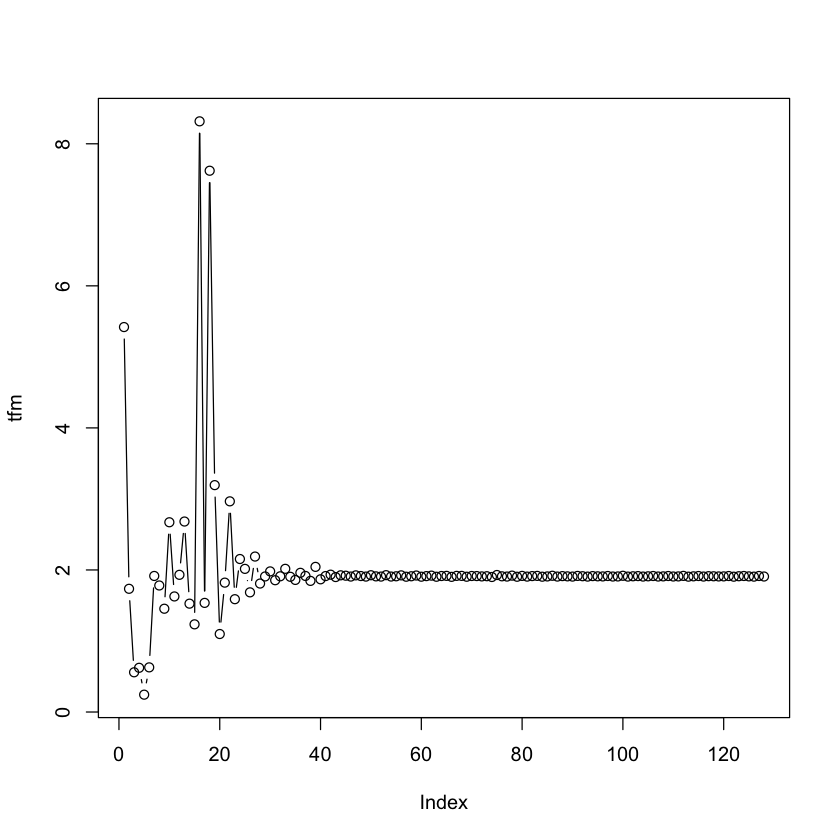

In [183]:
tfm<-wRxy$spec/wx$spec 

plot(tfm, type="b")

La función de transferencia también puede considerarse como la respuesta de un sistema inicialmente inerte a un impulso como señal de entrada

* En este caso se aplica una pulso considerando la función de transfeencia antes calculada (tfm)

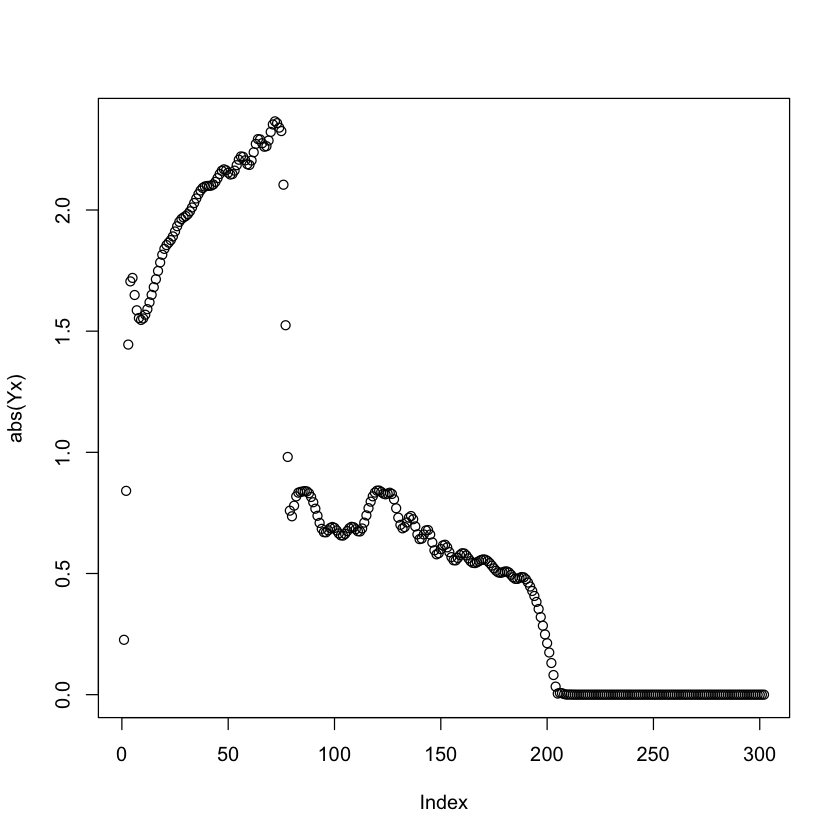

In [8]:
t=35;
fin= t/0.2;
drop=76;
step=rep(1,fin)
step[drop:fin]=rep(0,fin-drop+1);
fw= butter(2,0.3);
step_f = filter(fw$b,fw$a,step);


tfm_t<-ifft(tfm)

Yx=conv(step_f,tfm_t)

plot(abs(Yx))